<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Aula_IA_2_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Engenharia de Dados

A engenharia de dados é fundamental para preparar os dados antes de aplicarmos modelos de aprendizado de máquina. Essa preparação pode incluir diversas transformações e criações de novas variáveis que ajudam a tornar os dados mais informativos e adequados para análise. A seguir, apresento uma breve explicação sobre alguns dos processos comuns e um exemplo em código comentado, além de aplicações práticas de cada transformação:


In [14]:
import pandas as pd               # Manipulação de DataFrames
import numpy as np                # Operações numéricas
import matplotlib.pyplot as plt   # Criação de gráficos
import seaborn as sns             # Visualizações estatísticas

# Gerar dados sintéticos na temática de saúde
np.random.seed(42)
# Número de amostrar para o exemplo - banco de dados
n = 500

data = {
    'idade': np.random.randint(18, 90, size=n),
    'sexo': np.random.choice(['Masculino', 'Feminino'], size=n),
    'peso': np.round(np.random.uniform(50, 120, size=n), 1),
    'altura': np.round(np.random.uniform(1.4, 2.0, size=n), 2),
    'tabagismo': np.random.choice(['Sim', 'Não'], size=n),
    'hipertensao': np.random.choice(['Sim', 'Não'], size=n),
    'diabetes': np.random.choice(['Sim', 'Não'], size=n),
    # Colesterol com distribuição normal
    # Média de 300 mg/dL, desvio padrão de 50, limitando valores entre 100 e 500
    'colesterol': np.clip(np.random.normal(loc=300, scale=50, size=n), 100, 500).astype(int),
    # Média de 400 mg/dL, desvio de 150, limitar valores entre 50 e 1000 mg/dL
    'triglicerides': np.clip(np.random.normal(loc=400, scale=150, size=n), 50, 1000).astype(int),
}
# Cria um DataFrame a partir do dicionário
df = pd.DataFrame(data)

# Exibe o DataFrame original
print("DataFrame Original: ")
print(df)

DataFrame Original: 
     idade       sexo   peso  altura tabagismo hipertensao diabetes  \
0       69   Feminino   60.8    1.85       Não         Sim      Não   
1       32   Feminino   83.7    1.48       Sim         Sim      Não   
2       89  Masculino   87.3    1.85       Não         Sim      Sim   
3       78  Masculino   53.6    1.41       Não         Sim      Sim   
4       38  Masculino   73.6    1.41       Não         Não      Não   
..     ...        ...    ...     ...       ...         ...      ...   
495     34   Feminino   93.5    1.49       Sim         Não      Não   
496     88   Feminino   53.2    1.62       Não         Não      Não   
497     62   Feminino  111.0    1.44       Sim         Não      Sim   
498     21  Masculino  118.1    1.42       Não         Não      Sim   
499     53   Feminino  117.8    1.48       Não         Sim      Não   

     colesterol  triglicerides  
0           291            458  
1           276            201  
2           201            

## Conversão de Variáveis Contínuas – Binárias

Por quê?

- Para simplificar a análise e destacar a presença ou ausência de uma característica.
- Útil em casos onde você deseja separar os dados em dois grupos (por exemplo, alta vs. baixa renda).

Quando?

- Quando há um valor de corte ou threshold que faz sentido do ponto de vista do negócio ou da análise.


In [15]:
# Definir um threshold para os níveis de triglicerideos
# Neste exemplo iremos considerar valores acima de 150 como doente
threshold = 150

# Criar uma nova coluna 'status_triglicerides'
# Se o valor for maior que o corte (150), a condição será true e iremos atribuir o valor 1 - Doente
# Caso contrério, atribuiremos 0 - não doente
df['status_triglicerides'] = np.where(df['triglicerides'] > threshold, 1, 0)

# Exibir apenas as colunas 'triglicerides' e 'status_triglicerides' para conferir o resultado
print(df[['triglicerides', 'status_triglicerides']])

     triglicerides  status_triglicerides
0              458                     1
1              201                     1
2              557                     1
3              575                     1
4              365                     1
..             ...                   ...
495            513                     1
496            502                     1
497            677                     1
498            373                     1
499            500                     1

[500 rows x 2 columns]


## Conversão de Variáveis Contínuas – Categóricas

Por quê?

- Permite agrupar dados em faixas ou categorias, facilitando a interpretação.
- Pode revelar padrões em segmentos específicos (por exemplo, faixas etárias).

Quando?

- Quando os intervalos dos dados possuem significado (como “jovem”, “adulto” e “idoso” para a idade).

In [16]:
# Cálculo de IMC
# Fórmula: IMC = peso / (alturaˆ2)
df['imc'] = df['peso'] / (df['altura'] ** 2)

# Converter o IMC contínuo para categórico com categorias numéricas
# Definir cada categoria
# - Categoria 1 (subpeso): IMC < 18.5
# - Categoria 2 (normal): 18.5 <= a < 25
# - Categoria 3 (sobrepeso): 25 <= a < 30
# - Categoria 4 (obeso): >= 30

bins = [0, 18.5, 25, 30, np.inf]
labels = ['Subpeso', 'Normal', 'Sobrepeso', 'Obeso']

df['categoria_imc'] = pd.cut(df['imc'], bins=bins, labels=labels)

# Exibindo apenas as colunas 'imc' e 'categoria_imc' para conferir o resultado
print(df[['peso', 'altura', 'imc', 'categoria_imc']])

      peso  altura        imc categoria_imc
0     60.8    1.85  17.764792       Subpeso
1     83.7    1.48  38.212199         Obeso
2     87.3    1.85  25.507670     Sobrepeso
3     53.6    1.41  26.960414     Sobrepeso
4     73.6    1.41  37.020271         Obeso
..     ...     ...        ...           ...
495   93.5    1.49  42.115220         Obeso
496   53.2    1.62  20.271300        Normal
497  111.0    1.44  53.530093         Obeso
498  118.1    1.42  58.569728         Obeso
499  117.8    1.48  53.780131         Obeso

[500 rows x 4 columns]


##Criação de Variáveis Dummies

Por quê?

- Transformam variáveis categóricas em variáveis numéricas binárias (0 ou 1) para serem usadas em modelos que não aceitam variáveis categóricas.
- Cada dummy representa a presença (1) ou ausência (0) de uma categoria.

Quando?

- Sempre que se tem dados categóricos e o algoritmo de modelagem exige variáveis numéricas.

In [17]:
# Variaveis dummies permitem que modelo numéricos utilizem dados categóricos
# 'drop_first = True' evita a armadilha da multicolinearidade, ou seja,
# Reduzir a redundância entre as novas vars criadas
df['dummies_sexo'] = pd.get_dummies(df['sexo'], prefix='sexo', drop_first=True)
df['dummies_tabagismo'] = pd.get_dummies(df['tabagismo'], prefix='tabagismo', drop_first=True)
df['dummies_hipertensao'] = pd.get_dummies(df['hipertensao'], prefix='hipertensao', drop_first=True)
df['dummies_diabetes'] = pd.get_dummies(df['diabetes'], prefix='diabetes', drop_first=True)

##Transformação Logarítmica de Variáveis Contínuas

A transformação logarítmica é especialmente útil quando temos variáveis com distribuições altamente assimétricas (com "cauda longa" à direita), o que é comum em medidas biológicas como colesterol e triglicerídeos. Ao aplicar o logaritmo, os valores extremos são comprimidos, tornando a distribuição mais simétrica e, em muitos casos, mais próxima de uma distribuição normal. Isso pode melhorar a performance e a robustez de muitos algoritmos de machine learning que assumem normalidade dos dados ou são sensíveis a outliers.

Por quê?

- Ajuda a normalizar distribuições enviesadas e reduzir a influência de valores extremos.
- Facilita a modelagem quando os dados têm grande variação (por exemplo, renda, preços).

Quando?

- Quando a distribuição da variável é altamente assimétrica (distribuição com cauda longa) e se deseja aproximá-la de uma distribuição normal.

Um dos desafios do uso de transformações logarítmicas é que, embora elas sejam úteis para normalizar distribuições e reduzir a influência de outliers, os valores transformados podem ser menos intuitivos para interpretação no contexto prático. Quando for comunicar os resultados ou tomar decisões clínicas, converta os resultados de volta para a escala original. Por exemplo, se o modelo prevê um valor logarítmico, aplique a exponenciação para retornar ao valor real.


In [18]:
# Transformação Logarítmica das variáveis 'colesterol' e 'triglicerides'
# Aplicar a transformação logarítmica para reduzir a assimetria e atenuar o efeito de outliers.
df['log_colesterol'] = np.log(df['colesterol'])
df['log_triglicerides'] = np.log(df['triglicerides'])

print(df[['colesterol', 'log_colesterol', 'triglicerides', 'log_triglicerides']])

     colesterol  log_colesterol  triglicerides  log_triglicerides
0           291        5.673323            458           6.126869
1           276        5.620401            201           5.303305
2           201        5.303305            557           6.322565
3           337        5.820083            575           6.354370
4           246        5.505332            365           5.899897
..          ...             ...            ...                ...
495         254        5.537334            513           6.240276
496         350        5.857933            502           6.218600
497         313        5.746203            677           6.517671
498         327        5.789960            373           5.921578
499         317        5.758902            500           6.214608

[500 rows x 4 columns]


# Histograma para Colesterol


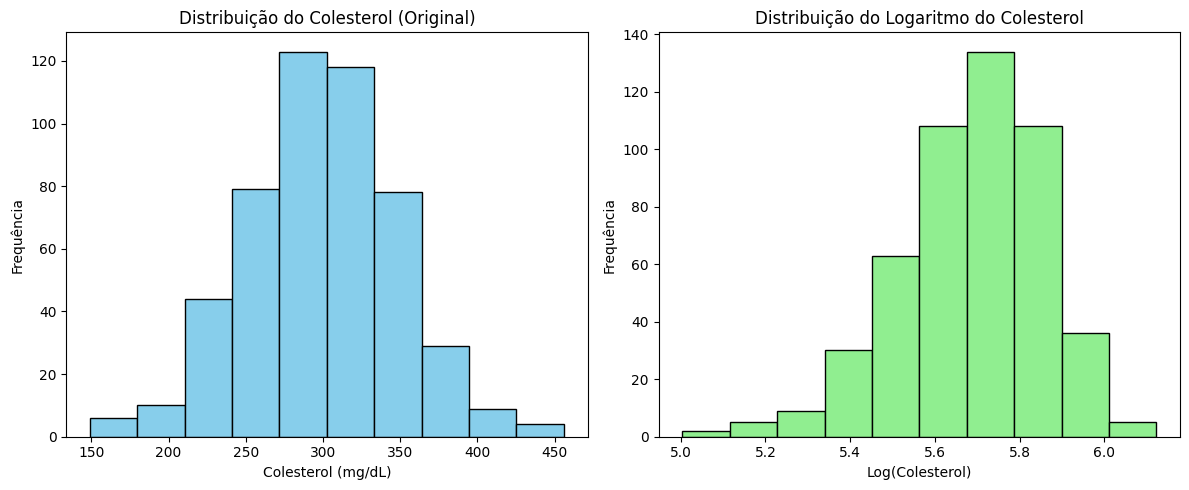

In [19]:
plt.figure(figsize=(12, 5))

# Histograma da variável original 'colesterol'
plt.subplot(1, 2, 1)
plt.hist(df['colesterol'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição do Colesterol (Original)')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frequência')

# Histograma da variável transformada 'log_colesterol'
plt.subplot(1, 2, 2)
plt.hist(df['log_colesterol'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribuição do Logaritmo do Colesterol')
plt.xlabel('Log(Colesterol)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Histograma para Triglicerídeos


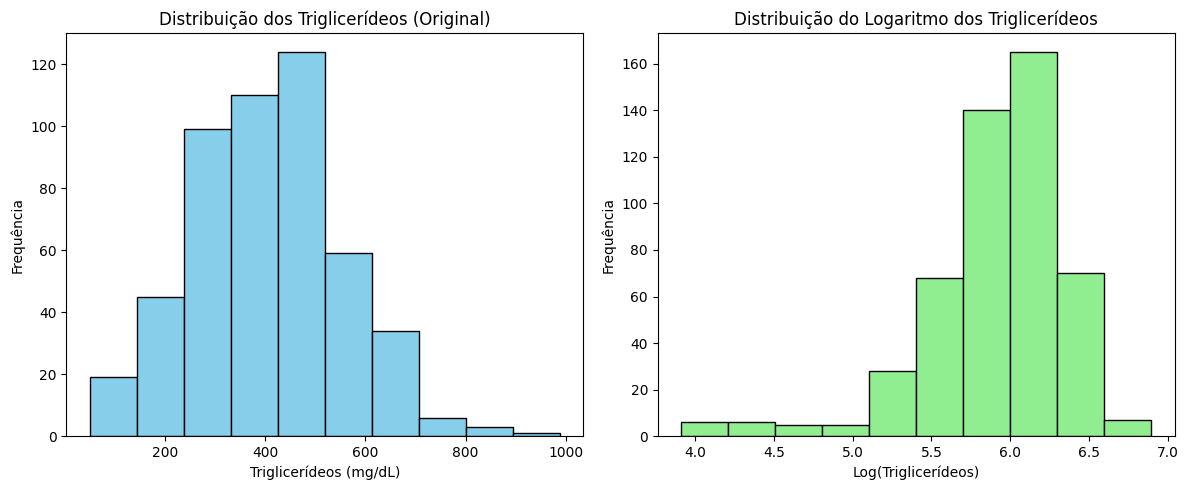

In [20]:
plt.figure(figsize=(12, 5))

# Histograma da variável original 'triglicerides'
plt.subplot(1, 2, 1)
plt.hist(df['triglicerides'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Triglicerídeos (Original)')
plt.xlabel('Triglicerídeos (mg/dL)')
plt.ylabel('Frequência')

# Histograma da variável transformada 'log_triglicerides'
plt.subplot(1, 2, 2)
plt.hist(df['log_triglicerides'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribuição do Logaritmo dos Triglicerídeos')
plt.xlabel('Log(Triglicerídeos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()